### Step 1: Has the increase in Co-vid 19 cases affected the demand for investments in the tech retail industry in the USA?

#### Step 2: Packages need to perform data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
import seaborn as sns
import statsmodels.api as sm
sns.set()

C:\Users\Dell\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


#### Step 3: Reading in Co-vid 19 global data received from WHO and Share price data of Amazon and GAP Inc from yahoo finance

In [2]:
data = pd.read_csv('WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'], index_col='Date_reported')
data

start = dt.datetime(2020, 1, 20)
end = dt.datetime(2020, 6, 20)


df_amazon = web.DataReader('AMZN', 'yahoo', start, end)
df_GAP = web.DataReader('GPS','yahoo', start, end)



In [3]:
# industry data
df_amazon.to_csv('amazon data.csv')
df_GAP.to_csv('GAP Inc.csv')


# Covid-19 data from USA
america = data[data.Country=='United States of America']
america

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-20 00:00:00+00:00,US,United States of America,AMRO,1,1,0,0
2020-01-21 00:00:00+00:00,US,United States of America,AMRO,0,1,0,0
2020-01-22 00:00:00+00:00,US,United States of America,AMRO,0,1,0,0
2020-01-23 00:00:00+00:00,US,United States of America,AMRO,0,1,0,0
2020-01-24 00:00:00+00:00,US,United States of America,AMRO,1,2,0,0
...,...,...,...,...,...,...,...
2020-06-16 00:00:00+00:00,US,United States of America,AMRO,21754,2079592,372,115484
2020-06-17 00:00:00+00:00,US,United States of America,AMRO,18514,2098106,496,115980
2020-06-18 00:00:00+00:00,US,United States of America,AMRO,27921,2126027,722,116702


In [4]:
amazon = pd.read_csv('amazon data.csv', parse_dates=['Date'], index_col='Date')
amazon

GAP = pd.read_csv('GAP Inc.csv', parse_dates=['Date'], index_col='Date')
GAP

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-21,18.530001,18.020000,18.530001,18.150000,6271500.0,17.482113
2020-01-22,18.299999,17.950001,18.270000,17.959999,3897400.0,17.299105
2020-01-23,17.900000,17.500000,17.850000,17.809999,3338100.0,17.154623
2020-01-24,17.990000,17.469999,17.840000,17.660000,4700200.0,17.010143
2020-01-27,17.889999,17.250000,17.340000,17.690001,4149000.0,17.039042
...,...,...,...,...,...,...
2020-06-15,10.660000,9.630000,9.800000,10.490000,14915800.0,10.490000
2020-06-16,11.730000,10.800000,11.720000,11.380000,16782200.0,11.380000
2020-06-17,11.250000,10.710000,11.220000,10.760000,11636000.0,10.760000


#### Step 4: Checking if the data received is clean

In [5]:
data.isna()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-02-24 00:00:00+00:00,False,False,False,False,False,False,False
2020-02-25 00:00:00+00:00,False,False,False,False,False,False,False
2020-02-26 00:00:00+00:00,False,False,False,False,False,False,False
2020-02-27 00:00:00+00:00,False,False,False,False,False,False,False
2020-02-28 00:00:00+00:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2020-06-16 00:00:00+00:00,False,False,False,False,False,False,False
2020-06-17 00:00:00+00:00,False,False,False,False,False,False,False
2020-06-18 00:00:00+00:00,False,False,False,False,False,False,False


In [6]:
df_amazon.isna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-21,False,False,False,False,False,False
2020-01-22,False,False,False,False,False,False
2020-01-23,False,False,False,False,False,False
2020-01-24,False,False,False,False,False,False
2020-01-27,False,False,False,False,False,False
...,...,...,...,...,...,...
2020-06-15,False,False,False,False,False,False
2020-06-16,False,False,False,False,False,False
2020-06-17,False,False,False,False,False,False


In [7]:
df_GAP.isna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-21,False,False,False,False,False,False
2020-01-22,False,False,False,False,False,False
2020-01-23,False,False,False,False,False,False
2020-01-24,False,False,False,False,False,False
2020-01-27,False,False,False,False,False,False
...,...,...,...,...,...,...
2020-06-15,False,False,False,False,False,False
2020-06-16,False,False,False,False,False,False
2020-06-17,False,False,False,False,False,False


#### Step 5: Analysizing of data

In [8]:
#Weekly reported Covid-19 cases in USA
america_cases=america.New_cases.resample('W').mean()

#Weekly average close share prices of Amazon and GAP Inc.
amazon_close = amazon.Close.resample('W').mean()
GAP_close=GAP.Close.resample('W').mean()

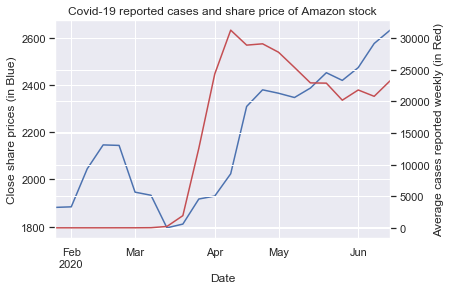

In [9]:
#Weekly average close share prices of Amazon and average Covid-19 weekly cases
amazon_close.plot(color='b', title = 'Covid-19 reported cases and share price of Amazon stock')
plt.ylabel('Close share prices (in Blue)')

plt.twinx()

america_cases.plot(color='r')
plt.ylabel('Average cases reported weekly (in Red)')
plt.show()

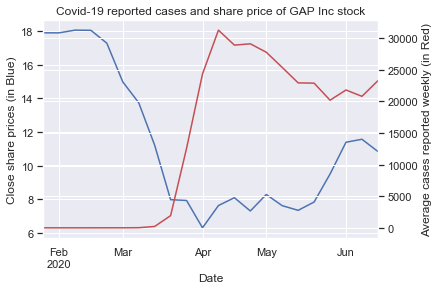

In [10]:
GAP_close.plot(title= 'Covid-19 reported cases and share price of GAP Inc stock')
plt.ylabel('Close share prices (in Blue)')

plt.twinx()

america_cases.plot(color='r')
plt.ylabel('Average cases reported weekly (in Red)')
plt.show()

#### Step 6: Interpretation of results

In this investigation we looked at how the growth in Co-vid 19 cases globally, in this case we looked at the USA, affected the lowest share prices
   of Amazon stock and GAP Inc stock (which is one of the largest global clothing retailers). It was noted that industries started 
   getting affected adversely before the spike in cumulative cases in the USA but as the situation was getting worse in the USA
   some tech retailers such as Amazon started experiencing an increase in their lowest daily share price while companies like
   GAP Inc lowest share price continued to plummet gradually. 
   
   This occurrence may suggest that there has been a change in investment preference by top global investors, where
   they chose to now invest more in the tech industry and less in the other industries, which subsequently drove the lowest
   prices high (due to higher demand).